# TP 3 - Estimation robuste

In [24]:
%%file exercice_0.m
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

% Parametres :
alpha = pi/180*12;			% Seuil sur l'orientation du gradient (en radians)
cos_alpha = cos(alpha);
seuil_norme = 2/sin(alpha);		% Seuil sur la norme du gradient (decoule d'une etude theorique)

% Chargement des donnees :
load Donnees/parquet;
%load Donnees/bateau;
[n_lignes,n_colonnes] = size(I);
limites_affichages = [1 n_colonnes 1 n_lignes];

figure('Name','Detection des alignements','Position',[0.2*L,0,0.8*L,H]);

% Affichage de l'image :
subplot(2,2,1);
imagesc(I);
axis equal;
axis off;
colormap gray;
title('Image originale','FontSize',30);
axis(limites_affichages);

% Fenetre d'affichage des pixels de contour :
subplot(2,2,3);
imagesc(I);
axis equal;
axis off;
colormap gray;
hold on;

% Gradient du niveau de gris (x vers la droite, y vers le bas) :
I = double(I);
[G_x,G_y] = gradient(I);
G_norme = sqrt(G_x.^2+G_y.^2);

% Selection des pixels de contour :
contour = G_norme>seuil_norme;

% Pas de pixel de contour sur le bord de l'image => Traitement simplifie !
contour([1 n_lignes],:) = 0;
contour(:,[1 n_colonnes]) = 0;

% Tri des pixels de contour :
indices_contour = find(contour);
[~,indices] = sort(G_norme(indices_contour),'descend');
indices_contour = indices_contour(indices);

% Affichage d'une petite fleche sur les pixels de contour :
[i,j] = ind2sub(size(I),indices_contour);
quiver(j,i,G_x(indices_contour),G_y(indices_contour),'r');	% Attention : x = j et y = i
axis equal;
title('Pixels de contour','FontSize',30);
axis(limites_affichages);
drawnow;

% Affichage des ensembles E (la fonction label2rgb donne a chaque ensemble E une couleur differente) :
subplot(2,2,2);
imagesc(I_resultat);
axis(limites_affichages);
axis equal;
axis off;
title('Ensembles candidats','FontSize',30);

% Affichage de l'esquisse :
subplot(2,2,4);
imagesc(120*ones(size(I)),[0,255]);
axis equal;
axis off;
title('Alignements','FontSize',30);
hold on;
axis(limites_affichages);

% Boucle sur les ensembles E :
for k = 1:size(extremites,3)
	% Affichage du segment :
	line(extremites(1,:,k),extremites(2,:,k),'Color','w','LineWidth',2);
end

save exercice_0;


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp3/donnees_TP3_stats/exercice_0.m'.


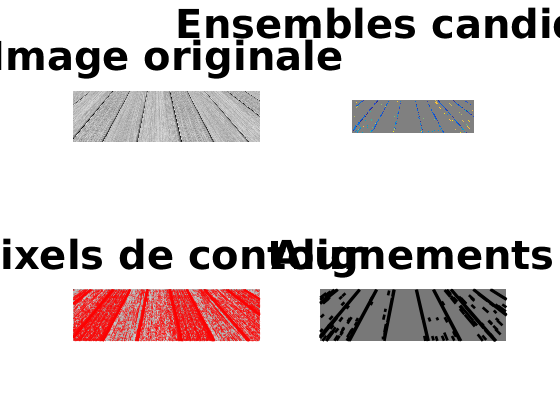

In [25]:
run("exercice_0.m")

In [26]:
%%file exercice_1.m
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

load exercice_0;

% Estimation du point de fuite :
[rho_F,theta_F] = estimation_F(rho,theta);

% Coordonnees cartesiennes du point de fuite :
x_F = rho_F*cos(theta_F);
y_F = rho_F*sin(theta_F);

figure('Name','Estimation du point de fuite','Position',[0.7*L,0,0.3*L,H]);

% Affichage des points de coordonnees (rho,theta) :
subplot(2,1,1);
plot(theta,rho,'k+','MarkerSize',10,'LineWidth',2);
axis([-pi pi -1.2*rho_F 1.2*rho_F]);
set(gca,'FontSize',20);
hx = xlabel('$\theta$','FontSize',30);
set(hx,'Interpreter','Latex');
hy = ylabel('$\rho$','FontSize',30);
set(hy,'Interpreter','Latex');
grid;
hold on;

% Affichage de la sinusoide correspondant au point de fuite :
pas = 0.01;
theta_affichage = -pi:pas:pi;
rho_affichage = rho_F*cos(theta_affichage-theta_F);
plot(theta_affichage,rho_affichage,'b-','LineWidth',3);

% Affichage des points de coordonnees (rho,theta) :
plot(theta,rho,'r+','MarkerSize',10,'LineWidth',2);
title('Sinusoide estimee');

% Affichage de l'image :
subplot(2,1,2);
imagesc(I);
set(gca,'FontSize',20);
axis ij equal off;
colormap gray;
hold on;

% Limites des affichages :
marge = round(min(n_lignes,n_colonnes)/10);
x_min = min(1,x_F)-marge;
x_max = max(n_colonnes,x_F)+marge;
y_min = min(1,y_F)-marge;
y_max = max(n_lignes,y_F)+marge;
limites_affichages = [x_min x_max y_min y_max];
axis(limites_affichages);

% Affichage d'une selection des droites formant le premier faisceau :
taille_selection = min(length(rho),10);
longueurs_segments_au_carre = (extremites(1,1,:)-extremites(1,2,:)).^2 ...
				+(extremites(2,1,:)-extremites(2,2,:)).^2;
[~,indices_tries] = sort(longueurs_segments_au_carre,'descend');
selection = indices_tries(1:taille_selection);
affichage_faisceau(rho(selection),theta(selection),limites_affichages,'r');

% Affichage du point de fuite :
plot(x_F,y_F,'bx','MarkerSize',20,'LineWidth',5);
title('Point de fuite');


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp3/donnees_TP3_stats/exercice_1.m'.


In [27]:
%%file estimation_F.m
function [rho_F,theta_F] = estimation_F(rho,theta);
    % Estimation par projection orthogonal de B sur Im(A).
    % Construire A et B
    A = [cos(theta) sin(theta)];
    B = rho;
    % Faire la projection
    X_star = pinv(A)*B;
    x_F = X_star(1);
    y_F = X_star(2);
    rho_F = sqrt(x_F^2 + y_F^2);
    theta_F = atan2(y_F, x_F);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp3/donnees_TP3_stats/estimation_F.m'.


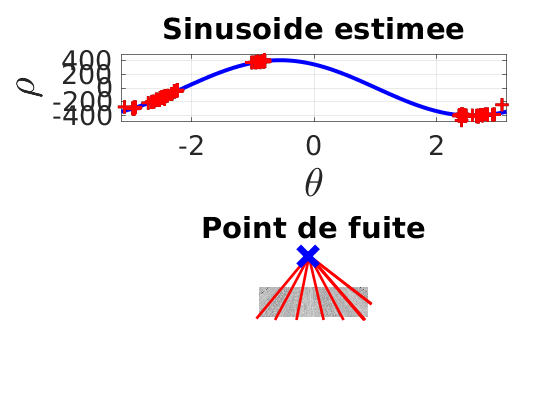

In [28]:
run("exercice_1.m")

Algorithme RANSAC:

- On tire au hasard deux droite ($d_{11}$ et $d_{12}$) et on calcule le point d'intersection ($A_1$).
- Toutes les droites qui passe a coter on les considere comme "donnée conforme".
- On compte la proportion de donnée conforme par rapport a l'ensemble des données si cette proportion est supérieur a $S_k$, alors on garde le point (il est considére comme non accepter: $\rho^{*}$ et $\theta^{*}$).
- Puis on refait l'estimation avec le modele accepter: ensemble de droite qui passe a coter du point accepter.


In [29]:
%%file exercice_2.m

clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

load exercice_0;

% Parametres de l'algorithme RANSAC :
n_donnees = length(rho);
S1 = 5;
S2 = 0.3;
k_max = floor(nchoosek(n_donnees,2)/n_donnees);
parametres = [S1 S2 k_max];

% Estimation du premier point de fuite :
[rho_F_1,theta_F_1] = RANSAC_2(rho,theta,parametres);

% Coordonnees cartesiennes du premier point de fuite :
x_F_1 = rho_F_1*cos(theta_F_1);
y_F_1 = rho_F_1*sin(theta_F_1);

% Droites conformes au premier point de fuite :
conformes_1 = abs(rho-rho_F_1*cos(theta-theta_F_1))<=S1;
rho_conformes_1 = rho(conformes_1);
theta_conformes_1 = theta(conformes_1);

% Droites restantes :
theta = theta(~conformes_1);
rho = rho(~conformes_1);

% Estimation du deuxieme point de fuite :
[rho_F_2,theta_F_2] = RANSAC_2(rho,theta,parametres);

% Coordonnees cartesiennes du deuxieme point de fuite :
x_F_2 = rho_F_2*cos(theta_F_2);
y_F_2 = rho_F_2*sin(theta_F_2);

% Droites conformes au deuxieme point de fuite :
conformes_2 = abs(rho-rho_F_2*cos(theta-theta_F_2))<=S1;
rho_conformes_2 = rho(conformes_2);
theta_conformes_2 = theta(conformes_2);

figure('Name','Estimation de la ligne de fuite','Position',[0.3*L,0,0.7*L,H]);

% Affichage des points de coordonnees (rho,theta) :
subplot(2,2,2);
plot(theta,rho,'k+','MarkerSize',10,'LineWidth',2);
rho_F_max = max(rho_F_1,rho_F_2);
axis([-pi pi -1.2*rho_F_max 1.2*rho_F_max]);
set(gca,'FontSize',20);
hx = xlabel('$\theta$','FontSize',30);
set(hx,'Interpreter','Latex');
hy = ylabel('$\rho$','FontSize',30);
set(hy,'Interpreter','Latex');
grid;
hold on;

% Affichage de la sinusoide correspondant au premier point de fuite :
pas = 0.01;
theta_affichage = -pi:pas:pi;
rho_affichage_1 = rho_F_1*cos(theta_affichage-theta_F_1);
plot(theta_affichage,rho_affichage_1,'b-','LineWidth',3);

% Affichage des points conformes a la premiere sinusoide :
plot(theta_conformes_1,rho_conformes_1,'r+','MarkerSize',10,'LineWidth',2);

% Affichage de la deuxieme sinusoide :
rho_affichage_2 = rho_F_2*cos(theta_affichage-theta_F_2);
plot(theta_affichage,rho_affichage_2,'m-','LineWidth',3);

% Affichage des points conformes a la deuxieme sinusoide :
plot(theta_conformes_2,rho_conformes_2,'g+','MarkerSize',10,'LineWidth',2);
title('Paire de sinusoides estimees');

% Affichage de l'image :
subplot(2,2,3);
imagesc(I);
set(gca,'FontSize',20);
axis ij equal off;
colormap gray;
hold on;

% Limites des affichages :
marge = round(min(n_lignes,n_colonnes)/10);
x_min = min(1,x_F_1);
x_min = min(x_min,x_F_2)-marge;
x_max = max(n_colonnes,x_F_1);
x_max = max(x_max,x_F_2)+marge;
y_min = min(1,y_F_1);
y_min = min(y_min,y_F_2)-marge;
y_max = max(n_lignes,y_F_1);
y_max = max(y_max,y_F_2)+marge;
limites_affichages = [x_min x_max y_min y_max];
axis(limites_affichages);

% Affichage d'une selection de droites formant le premier faisceau :
taille_selection_1 = min(length(rho_conformes_1),10);
longueurs_segments_au_carre_1 = (extremites(1,1,conformes_1)-extremites(1,2,conformes_1)).^2 ...
				+(extremites(2,1,conformes_1)-extremites(2,2,conformes_1)).^2;
[~,indices_tries_1] = sort(longueurs_segments_au_carre_1,'descend');
selection_1 = indices_tries_1(1:taille_selection_1);
affichage_faisceau(rho_conformes_1(selection_1),theta_conformes_1(selection_1),limites_affichages,'r');

% Affichage du premier point de fuite :
plot(x_F_1,y_F_1,'bx','MarkerSize',20,'LineWidth',5);

% Affichage d'une selection de droites formant le deuxieme faisceau :
taille_selection_2 = min(length(rho_conformes_2),10);
longueurs_segments_au_carre_2 = (extremites(1,1,conformes_2)-extremites(1,2,conformes_2)).^2 ...
				+(extremites(2,1,conformes_2)-extremites(2,2,conformes_2)).^2;
[~,indices_tries_2] = sort(longueurs_segments_au_carre_2,'descend');
selection_2 = indices_tries_2(1:taille_selection_2);
affichage_faisceau(rho_conformes_2(selection_2),theta_conformes_2(selection_2),limites_affichages,'g');

% Affichage du deuxieme point de fuite :
plot(x_F_2,y_F_2,'mx','MarkerSize',20,'LineWidth',5);
title('Paire de points de fuite');

% Affichage de l'image :
subplot(2,2,4);
imagesc(I);
set(gca,'FontSize',20);
axis ij equal off;
colormap gray;
hold on;
axis(limites_affichages);

% Affichage du premier point de fuite :
plot(x_F_1,y_F_1,'bx','MarkerSize',20,'LineWidth',5);

% Affichage du deuxieme point de fuite :
plot(x_F_2,y_F_2,'mx','MarkerSize',20,'LineWidth',5);

% Affichage de la ligne de fuite :
line([x_F_1 x_F_2],[y_F_1 y_F_2],'Color','c','LineWidth',2);
title('Ligne de fuite');

% Affichage de l'image originale :
subplot(2,2,1);
imagesc(I);
set(gca,'FontSize',20);
axis ij equal off;
colormap gray;
hold on;
title('Image originale');
axis(limites_affichages);


Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp3/donnees_TP3_stats/exercice_2.m'.


In [30]:
run("exercice_2.m")

Unrecognized function or variable 'RANSAC_2'.

Error in exercice_2 (line 18)
[rho_F_1,theta_F_1] = RANSAC_2(rho,theta,parametres);

Error in run (line 91)
evalin('caller', strcat(script, ';'));



In [117]:
%%file RANSAC_2.m

function [rho_F_1,theta_F_1] = RANSAC_2(rho,theta,parametres)
    n_donnees = length(rho);
    S1 = parametres(1);
    S2 = parametres(2);
    k_max = parametres(3);
    for i = 1:k_max
        meilleur_ecart_moy = Inf;
        meilleur_conforme = zeros(n_donnees);
        %1. Sous-ensemble de données
        droite_ind = randperm(n_donnees, 2);
        rho_modele = rho(droite_ind);
        theta_modele = theta(droite_ind);
        %2. Test relatif des autre données
        [rho_F,theta_F] = estimation_F(rho_modele,theta_modele); %Pts intersection d1 et d2
        proximite = abs(rho - rho_F*cos(theta - theta_F));
        indice_conforme = (proximite <= S1);
        prop_conforme = mean(indice_conforme);
        %3.Accepte si prop sup S2
        if prop_conforme >= S2 
            %4.Nouvelle estimation avec tout les donnee conforme
            rho_newmodele = rho(indice_conforme);
            theta_newmodele = theta(indice_conforme);
            [rho_FF,theta_FF] = estimation_F(rho,theta);
            ecart_moy = mean(abs(rho - rho_F*cos(theta - theta_F)));
            if ecart_moy<meilleur_ecart_moy
                meilleur_ecart_moy = ecart_moy;
                meilleur_conforme = indice_conforme;
                rho_F_1 = rho_FF;
                theta_F_1 = theta_FF;
            end;
        end;
    end;
end



Created file '/home/jblancho/Le-TP-de-Keunotor/stats/tp/tp3/donnees_TP3_stats/RANSAC_2.m'.


In [32]:
clear;
close all;
taille_ecran = get(0,'ScreenSize');
L = taille_ecran(3);
H = taille_ecran(4);

load exercice_0;

% Parametres de l'algorithme RANSAC :
n_donnees = length(rho);
S1 = 5;
S2 = 0.3;
k_max = floor(nchoosek(n_donnees,2)/n_donnees);
parametres = [S1 S2 k_max];

In [33]:
n_donnees


n_donnees =

   124



In [35]:
size(rho)


ans =

   124     1



In [87]:
S1 = parametres(1);
S2 = parametres(2);
k_max = parametres(3);

In [111]:
for i = 1:k_max
    meilleur_ecart_moy = Inf;
    meilleur_conforme = zeros(n_donnees);
    %1. Sous-ensemble de données
    droite_ind = randperm(n_donnees, 2);
    rho_modele = rho(droite_ind);
    theta_modele = theta(droite_ind);
    %2. Test relatif des autre données
    [rho_F,theta_F] = estimation_F(rho_modele,theta_modele); %Pts intersection d1 et d2
    proximite = abs(rho - rho_F*cos(theta - theta_F));
    indice_conforme = (proximite <= S1);
    prop_conforme = mean(indice_conforme);
    %3.Accepte si prop sup S2
    if prop_conforme >= S2 
        %4.Nouvelle estimation avec tout les donnee conforme
        rho_newmodele = rho(indice_conforme);
        theta_newmodele = theta(indice_conforme);
        [rho_FF,theta_FF] = estimation_F(rho,theta);
        ecart_moy = mean(abs(rho - rho_F*cos(theta - theta_F)));
        if ecart_moy<meilleur_ecart_moy
            meilleur_ecart_moy = ecart_moy;
            meilleur_conforme = indice_conforme;
        end;
    end;
end;

In [ ]:
%%file exercice_3

donnees_aberrantes;

n_tests = 1000;

% Parametres de l'algorithme RANSAC :
n_donnees = length(x_donnees_bruitees);
S1 = 2;
S2 = 0.5;
k_max = floor(nchoosek(n_donnees,3)/n_donnees);
parametres = [S1 S2 k_max];

% Estimation du rayon et de la position du centre :
[C_estime,R_estime] = RANSAC_3(x_donnees_bruitees,y_donnees_bruitees,parametres,n_tests);

% Affichage du cercle estime :
x_cercle_estime = C_estime(1)+R_estime*cos(theta_cercle);
y_cercle_estime = C_estime(2)+R_estime*sin(theta_cercle);
plot(x_cercle_estime([1:end 1]),y_cercle_estime([1:end 1]),'b','LineWidth',3);

% Affichage des points conformes au modele :
conformes = abs(sqrt((x_donnees_bruitees-C_estime(1)).^2+ ...
			(y_donnees_bruitees-C_estime(2)).^2)-R_estime)<=S1;
plot(x_donnees_bruitees(conformes), ...
	y_donnees_bruitees(conformes),'b+','MarkerSize',10,'LineWidth',2);
lg = legend(' Cercle initial', ...
		' Donnees (bruitees + aberrantes)', ...
		' Cercle estime', ...
		' Donnees conformes', ...
		'Location','Best');


In [67]:
%%file RANSAC_3.m

function [rho_F_1,theta_F_1] = RANSAC_3(rho,theta,parametres)
    n_donnees = length(rho);
    S1 = parametres(1);
    S2 = parametres(2);
    k_max = parametres(3);
    for i = 1:k_max
        meilleur_ecart_moy = Inf;
        meilleur_conforme = zeros(n_donnees);
        %1. Sous-ensemble de données
        droite_ind = randperm(n_donnees, 2);
        rho_modele = rho(droite_ind);
        theta_modele = theta(droite_ind);
        %2. Test relatif des autre données
        [rho_F,theta_F] = estimation_F(rho_modele,theta_modele); %Pts intersection d1 et d2
        proximite = abs(rho - rho_F*cos(theta - theta_F));
        indice_conforme = (proximite <= S1);
        prop_conforme = mean(indice_conforme);
        %3.Accepte si prop sup S2
        if prop_conforme >= S2 
            %4.Nouvelle estimation avec tout les donnee conforme
            rho_newmodele = rho(indice_conforme);
            theta_newmodele = theta(indice_conforme);
            [rho_FF,theta_FF] = estimation_F(rho,theta);
            ecart_moy = mean(abs(rho - rho_F*cos(theta - theta_F)));
            if ecart_moy<meilleur_ecart_moy
                meilleur_ecart_moy = ecart_moy;
                meilleur_conforme = indice_conforme;
                rho_F_1 = rho_FF;
                theta_F_1 = theta_FF;
            end;
        end;
    end;
end


